# Understanding sales in coffee chain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data & modifications

In [134]:
df = pd.read_excel("data/Coffee Shop Sales.xlsx")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [135]:
df['sales_value'] = df['transaction_qty'] * df['unit_price']
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales_value
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20


In [136]:
# Getting unique transactions
total_rows = len(df)
unique_transaction_ids = df['transaction_id'].nunique()

# Transaction id precise 
df['true_transaction_id'] = (
    df['transaction_date'].astype(str) + '_' +
    df['transaction_time'].astype(str) + '_' +
    df['store_id'].astype(str)
)
true_unique_transactions = df['true_transaction_id'].nunique()

# Transaction id minutes
df['transaction_time_trimmed'] = pd.to_datetime(df['transaction_time'].astype(str), format='%H:%M:%S').dt.strftime('%H:%M')
df['transaction_id_trimmed'] = (
    df['transaction_date'].astype(str) + '_' +
    df['transaction_time_trimmed'] + '_' +
    df['store_id'].astype(str)
)
unique_trimmed_transactions = df['transaction_id_trimmed'].nunique()

print(f"Total rows: {total_rows}")
print(f"Original unique transaction IDs: {unique_transaction_ids}")
print(f"True unique transactions (with seconds): {true_unique_transactions}")
print(f"True unique transactions (hour+minute): {unique_trimmed_transactions}")


Total rows: 149116
Original unique transaction IDs: 149116
True unique transactions (with seconds): 116790
True unique transactions (hour+minute): 97417


In [137]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.to_period('M')
df['transaction_time'] = pd.to_datetime(df['transaction_time'].astype(str), format='%H:%M:%S').dt.time
df['datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str))
df['hour_minute'] = df['datetime'].dt.strftime('%H:%M')
df[['transaction_time', 'datetime', 'hour_minute']].head()
df['weekday_num'] = df['transaction_date'].dt.weekday + 1 #in Poland we usually mark 1 as monday 7 as sunday
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales_value,true_transaction_id,transaction_time_trimmed,transaction_id_trimmed,month,datetime,hour_minute,weekday_num
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01-01_07:06:11_5,07:06,2023-01-01_07:06_5,2023-01,2023-01-01 07:06:11,07:06,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01-01_07:08:56_5,07:08,2023-01-01_07:08_5,2023-01,2023-01-01 07:08:56,07:08,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01-01_07:14:04_5,07:14,2023-01-01_07:14_5,2023-01,2023-01-01 07:14:04,07:14,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01-01_07:20:24_5,07:20,2023-01-01_07:20_5,2023-01,2023-01-01 07:20:24,07:20,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01-01_07:22:41_5,07:22,2023-01-01_07:22_5,2023-01,2023-01-01 07:22:41,07:22,7


In [138]:

unique_transactions = df.drop_duplicates(subset='true_transaction_id')
unique_transactions.shape

(116790, 19)

### Basic overview

In [ ]:
#Performance of stores basic overview
monthly_summary = (
    df.groupby(['store_location', 'month'])
      .agg(
          total_sales=('sales_value', 'sum'),
          total_quantity=('transaction_qty', 'sum'),
          transaction_count=('transaction_id', 'count')
      )
      .reset_index()
)

monthly_pivot = monthly_summary.melt(id_vars=['store_location', 'month'],
                                     var_name='metric',
                                     value_name='value')

pivot_table = monthly_pivot.pivot_table(
    index=['metric', 'store_location'],
    columns='month',
    values='value',
    fill_value=0
).sort_index()

pivot_table = pivot_table.sort_index()
pivot_table.columns = pivot_table.columns.astype(str)
formatted_pivot = pivot_table.map(lambda x: f"{x:,.2f}")
formatted_pivot


month                                2023-01    2023-02    2023-03    2023-04  \
metric            store_location                                                
total_quantity    Astoria           8,281.00   7,718.00   9,999.00  12,026.00   
                  Hell's Kitchen    8,340.00   7,937.00  10,198.00  12,194.00   
                  Lower Manhattan   8,249.00   7,895.00  10,209.00  12,249.00   
total_sales       Astoria          27,313.66  25,105.34  32,835.43  39,477.61   
                  Hell's Kitchen   27,820.65  25,719.80  33,110.57  40,304.14   
                  Lower Manhattan  26,543.43  25,320.05  32,888.68  39,159.33   
transaction_count Astoria           5,913.00   5,490.00   7,180.00   8,556.00   
                  Hell's Kitchen    5,868.00   5,606.00   7,267.00   8,629.00   
                  Lower Manhattan   5,533.00   5,263.00   6,782.00   8,150.00   

month                                2023-05    2023-06  
metric            store_location                         
total_quantity    Astoria          16,114.00  16,853.00  
                  Hell's Kitchen   15,944.00  17,124.00  
                  Lower Manhattan  16,175.00  16,965.00  
total_sales       Astoria          52,428.76  55,083.11  
                  Hell's Kitchen   52,598.93  56,957.08  
                  Lower Manhattan  51,700.07  54,445.69  
transaction_count Astoria          11,475.00  11,985.00  
                  Hell's Kitchen   11,294.00  12,071.00  
                  Lower Manhattan  10,758.00  11,296.00

In [ ]:
#Sales by product basic overview 
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['sales_value'] = df['transaction_qty'] * df['unit_price']
df['quarter'] = df['transaction_date'].dt.to_period('Q')

pivot_sales = (
    df.groupby(['store_location', 'quarter', 'product_category'])['sales_value']
    .sum()
    .reset_index()
    .pivot_table(index='product_category', columns=['store_location', 'quarter'], values='sales_value')
)

q1 = pivot_sales.xs('2023Q1', level=1, axis=1)
q2 = pivot_sales.xs('2023Q2', level=1, axis=1)
q1_share = q1.div(q1.sum(), axis=1) * 100
q2_share = q2.div(q2.sum(), axis=1) * 100
growth = (q2 - q1) / q1 * 100

q1.columns = [f"{col} Q1 Sales" for col in q1.columns]
q2.columns = [f"{col} Q2 Sales" for col in q2.columns]
q1_share.columns = [f"{col} Q1 Share (%)" for col in q1_share.columns]
q2_share.columns = [f"{col} Q2 Share (%)" for col in q2_share.columns]
growth.columns = [f"{col} Q2 vs Q1 Growth (%)" for col in growth.columns]

combined = pd.concat([q1, q2, q1_share, q2_share, growth], axis=1)

cols = [f"{store} {metric}" for store in ['Astoria', 'Hell\'s Kitchen', 'Lower Manhattan']
        for metric in ['Q1 Sales', 'Q2 Sales', 'Q1 Share (%)', 'Q2 Share (%)', 'Q2 vs Q1 Growth (%)']
        if f"{store} {metric}" in combined.columns]

combined = combined[cols].round(2).map(lambda x: f"{x:,.2f}")

combined


,Astoria Q1 Sales,Astoria Q2 Sales,Astoria Q1 Share (%),Astoria Q2 Share (%),Astoria Q2 vs Q1 Growth (%),Hell's Kitchen Q1 Sales,Hell's Kitchen Q2 Sales,Hell's Kitchen Q1 Share (%),Hell's Kitchen Q2 Share (%),Hell's Kitchen Q2 vs Q1 Growth (%),Lower Manhattan Q1 Sales,Lower Manhattan Q2 Sales,Lower Manhattan Q1 Share (%),Lower Manhattan Q2 Share (%),Lower Manhattan Q2 vs Q1 Growth (%)
product_category,,,,,,,,,,,,,,,
Bakery,"9,889.75","16,710.00",11.60,11.37,68.96,"10,104.25","17,282.70",11.66,11.53,71.04,"10,483.15","17,845.79",12.37,12.28,70.23
Branded,"2,092.00","3,365.00",2.45,2.29,60.85,650.00,"1,292.00",0.75,0.86,98.77,"2,184.00","4,024.00",2.58,2.77,84.25
Coffee,"32,761.55","56,982.75",38.43,38.77,73.93,"33,573.90","57,648.75",38.75,38.47,71.71,"32,493.95","56,491.55",38.34,38.88,73.85
Coffee beans,"3,866.90","6,352.30",4.54,4.32,64.27,"6,418.10","12,217.00",7.41,8.15,90.35,"4,293.95","6,937.00",5.07,4.77,61.55
Drinking Chocolate,"9,611.50","16,723.75",11.27,11.38,74.00,"8,649.50","14,936.75",9.98,9.97,72.69,"8,462.50","14,032.00",9.98,9.66,65.81
Flavours,664.00,"1,100.80",0.78,0.75,65.78,"1,039.20","1,837.60",1.20,1.23,76.83,"1,373.60","2,393.60",1.62,1.65,74.26
Loose Tea,"1,213.15","1,980.85",1.42,1.35,63.28,"1,617.25","2,844.10",1.87,1.90,75.86,"1,388.25","2,170.00",1.64,1.49,56.31
Packaged Chocolate,384.48,705.23,0.45,0.48,83.42,603.27,"1,095.50",0.70,0.73,81.59,573.41,"1,045.75",0.68,0.72,82.37
Tea,"24,771.10","43,068.80",29.06,29.30,73.87,"23,995.55","40,705.75",27.69,27.16,69.64,"23,499.35","40,365.40",27.73,27.78,71.77


## Analysis
### Time 

In [51]:
# Opening hours
store_hours = (
    df.groupby(['store_location', 'month'])['hour_minute']
    .agg(first_transaction='min', last_transaction='max')
    .reset_index()
)

chain_hours = (
    df.groupby('month')['hour_minute']
    .agg(first_transaction='min', last_transaction='max')
    .reset_index()
)

display(store_hours)
display(chain_hours)


,store_location,month,first_transaction,last_transaction
0,Astoria,2023-01,07:00,19:59
1,Astoria,2023-02,07:00,19:59
2,Astoria,2023-03,07:00,19:59
3,Astoria,2023-04,07:00,19:59
4,Astoria,2023-05,07:00,19:59
5,Astoria,2023-06,07:00,19:59
6,Hell's Kitchen,2023-01,06:30,20:58
7,Hell's Kitchen,2023-02,06:30,20:57
8,Hell's Kitchen,2023-03,06:30,20:58
9,Hell's Kitchen,2023-04,06:30,20:59


,month,first_transaction,last_transaction
0,2023-01,06:00,20:58
1,2023-02,06:00,20:57
2,2023-03,06:00,20:58
3,2023-04,06:00,20:59
4,2023-05,06:00,20:59
5,2023-06,06:00,20:59


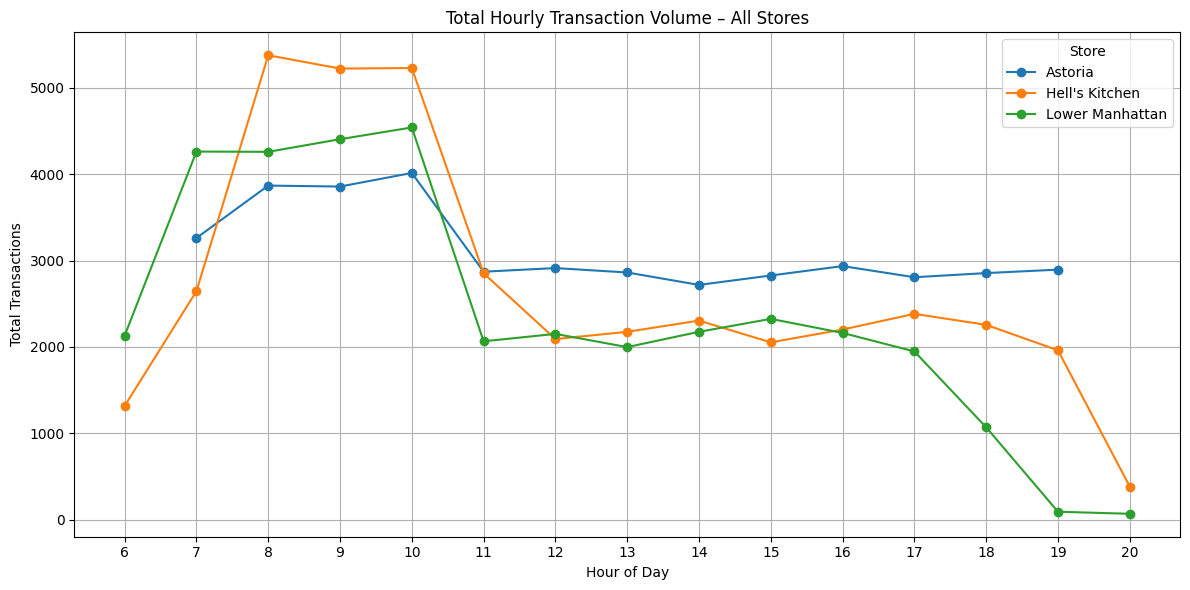

In [84]:
hourly_counts = (
    unique_transactions.groupby(['store_location', 'hour'])['true_transaction_id']
    .count()
    .reset_index(name='transaction_count')
)

plt.figure(figsize=(12, 6))
stores = hourly_counts['store_location'].unique()

for store in stores:
    data = hourly_counts[hourly_counts['store_location'] == store]
    plt.plot(data['hour'], data['transaction_count'], marker='o', label=store)

plt.title("Total Hourly Transaction Volume – All Stores")
plt.xlabel("Hour of Day")
plt.ylabel("Total Transactions")
plt.xticks(range(6, 21))
plt.grid(True)
plt.legend(title="Store")
plt.tight_layout()
plt.show()


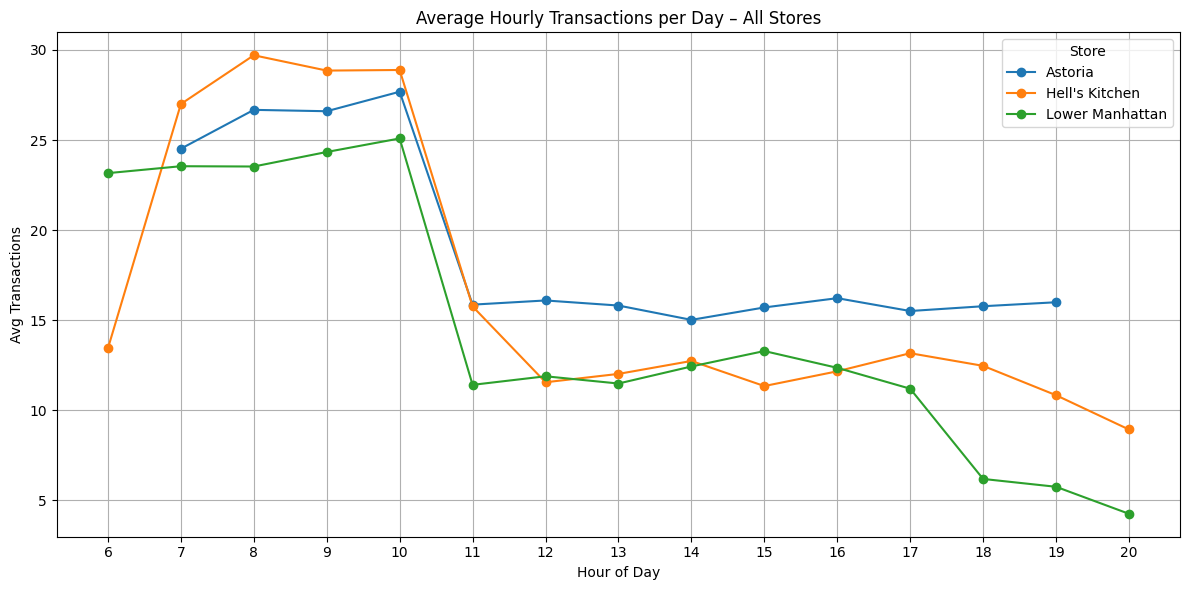

In [83]:
hourly_daily_counts = (
    unique_transactions
    .groupby(['store_location', 'transaction_date', 'hour'])['true_transaction_id']
    .count()
    .reset_index(name='transactions')
)

average_hourly = (
    hourly_daily_counts
    .groupby(['store_location', 'hour'])['transactions']
    .mean()
    .reset_index(name='avg_transactions')
)

plt.figure(figsize=(12, 6))
stores = average_hourly['store_location'].unique()

for store in stores:
    data = average_hourly[average_hourly['store_location'] == store]
    plt.plot(data['hour'], data['avg_transactions'], marker='o', label=store)

plt.title("Average Hourly Transactions per Day – All Stores")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Transactions")
plt.xticks(range(6, 21))
plt.grid(True)
plt.legend(title="Store")
plt.tight_layout()
plt.show()

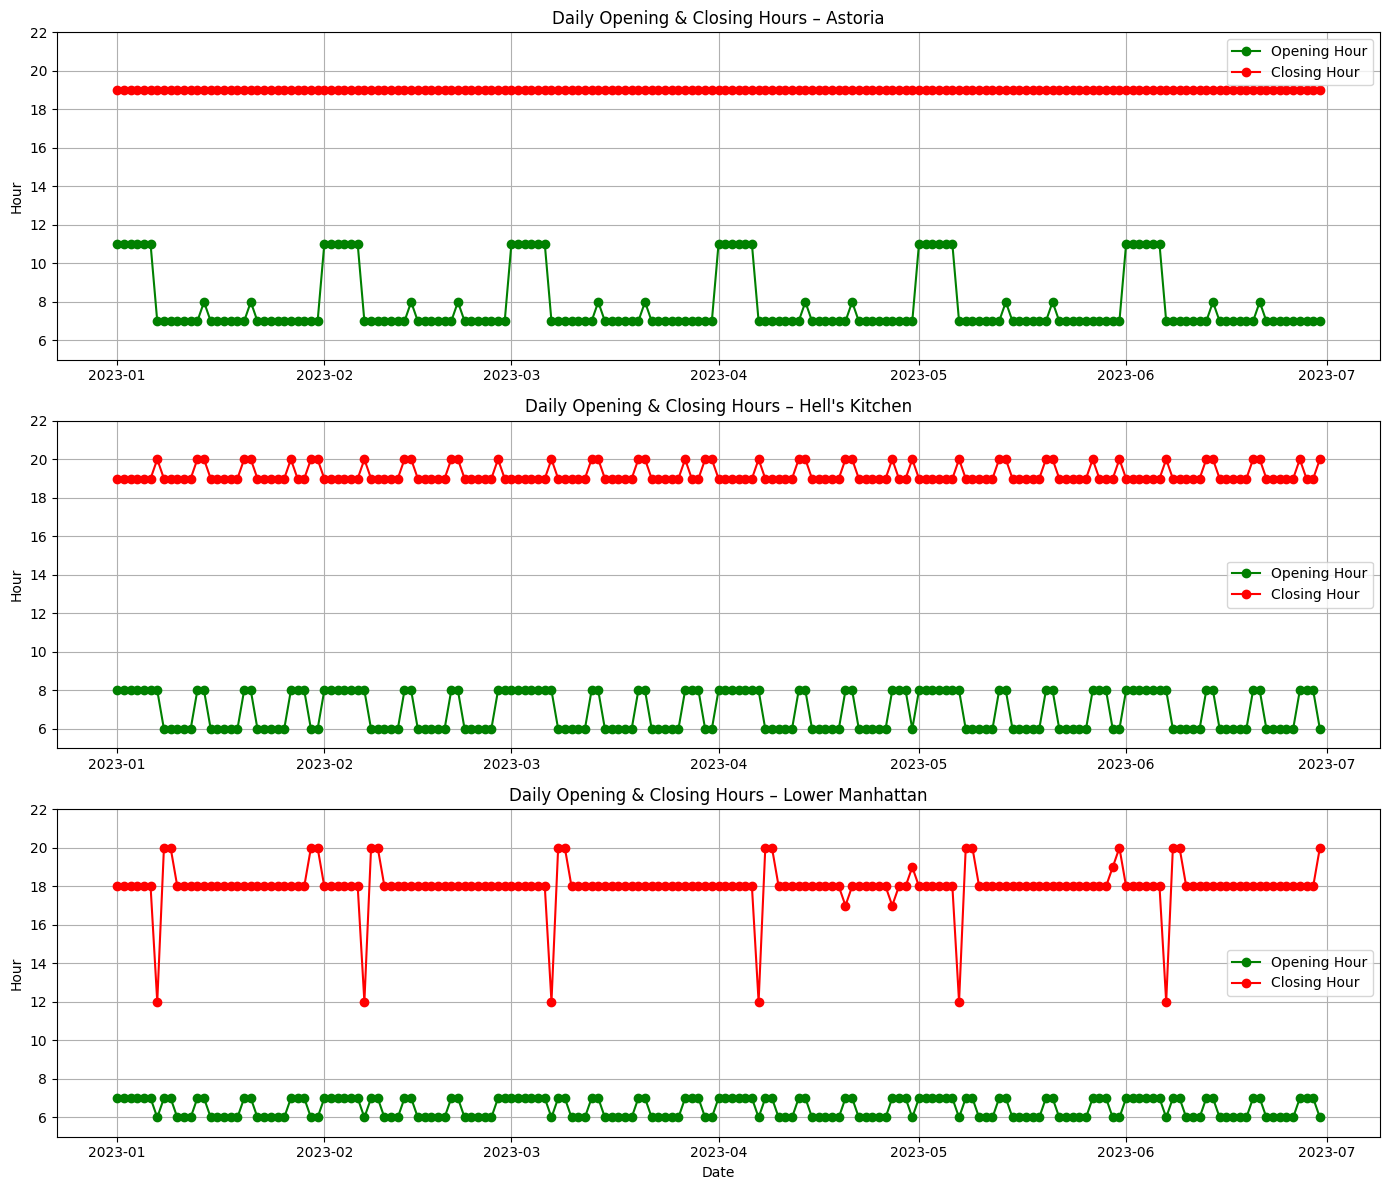

In [ ]:
# Get opening and closing hour per store per day
store_daily_hours = (
    unique_transactions.groupby(['store_location', 'transaction_date'])['hour']
    .agg(opening_hour='min', closing_hour='max')
    .reset_index()
)

stores = store_daily_hours['store_location'].unique()
fig, axes = plt.subplots(len(stores), 1, figsize=(14, 4 * len(stores)), sharex=False)

for ax, store in zip(axes, stores):
    data = store_daily_hours[store_daily_hours['store_location'] == store]
    ax.plot(data['transaction_date'], data['opening_hour'], label='Opening Hour', color='green', marker='o')
    ax.plot(data['transaction_date'], data['closing_hour'], label='Closing Hour', color='red', marker='o')
    ax.set_title(f"Daily Opening & Closing Hours – {store}")
    ax.set_ylabel("Hour")
    ax.set_ylim(5, 22)
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()


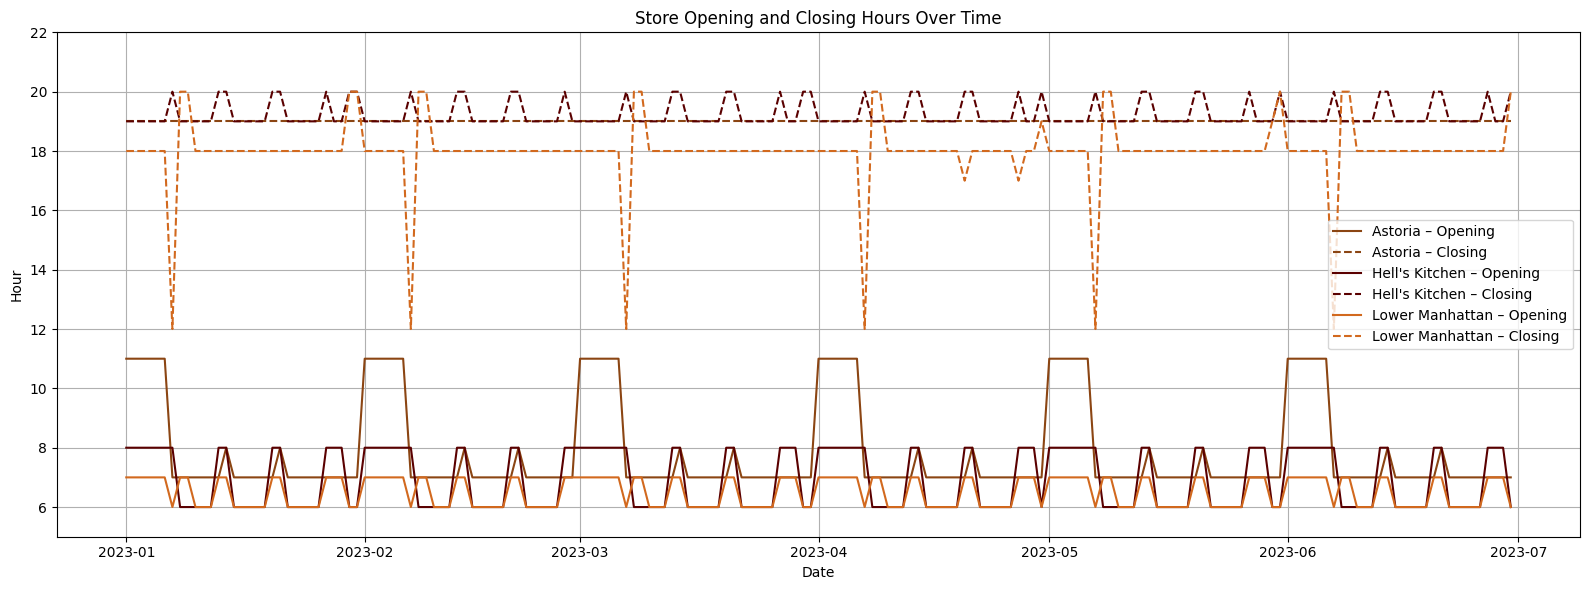

In [163]:

# Assign a unique brown shade for each store
store_colors = {
    'Astoria': '#8B4513',            # SaddleBrown
    "Hell's Kitchen": '#5A0000',     # Sienna
    'Lower Manhattan': '#D2691E'     # Chocolate
}

# Plot opening and closing hours for all stores on one chart
plt.figure(figsize=(16, 6))

for store in store_daily_hours['store_location'].unique():
    data = store_daily_hours[store_daily_hours['store_location'] == store]
    color = store_colors.get(store, 'brown')
    
    # Plot opening and closing hours using the same color
    plt.plot(data['transaction_date'], data['opening_hour'], label=f'{store} – Opening', color=color)
    plt.plot(data['transaction_date'], data['closing_hour'], label=f'{store} – Closing', color=color, linestyle='--')

plt.title("Store Opening and Closing Hours Over Time")
plt.ylabel("Hour")
plt.ylim(5, 22)
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Investigating Astoria pattern - to make sure it looks like opening hours issue
astoria = unique_transactions[unique_transactions['store_location'] == 'Astoria'].copy()

daily_opening = (
    astoria.groupby('transaction_date')['hour']
    .min()
    .reset_index(name='opening_hour')
)

late_openings = daily_opening[daily_opening['opening_hour'] > 7]

late_openings.head(24)

,transaction_date,opening_hour
0,2023-01-01,11
1,2023-01-02,11
2,2023-01-03,11
3,2023-01-04,11
4,2023-01-05,11
5,2023-01-06,11
13,2023-01-14,8
20,2023-01-21,8
31,2023-02-01,11
32,2023-02-02,11


In [ ]:
# Investigating Hell's Kitchen opening hours
hk = unique_transactions[unique_transactions['store_location'] == "Hell's Kitchen"].copy()

hk_daily_hours = (
    hk.groupby('transaction_date')['hour']
    .agg(opening_hour='min', closing_hour='max')
    .reset_index()
)
opened_6_closed_20 = hk_daily_hours[
    (hk_daily_hours['opening_hour'] == 6) &
    (hk_daily_hours['closing_hour'] == 20)
]
display(opened_6_closed_20)


,transaction_date,opening_hour,closing_hour
29,2023-01-30,6,20
30,2023-01-31,6,20
88,2023-03-30,6,20
89,2023-03-31,6,20
119,2023-04-30,6,20
150,2023-05-31,6,20
180,2023-06-30,6,20


In [76]:
summary = {
    'Open 6 / Close 20': len(hk_daily_hours[(hk_daily_hours['opening_hour'] == 6) & (hk_daily_hours['closing_hour'] == 20)]),
    'Open 6 / Close 19': len(hk_daily_hours[(hk_daily_hours['opening_hour'] == 6) & (hk_daily_hours['closing_hour'] == 19)]),
    'Open 8 / Close 19': len(hk_daily_hours[(hk_daily_hours['opening_hour'] == 8) & (hk_daily_hours['closing_hour'] == 19)]),
    'Open 8 / Close 20': len(hk_daily_hours[(hk_daily_hours['opening_hour'] == 8) & (hk_daily_hours['closing_hour'] == 20)]),
    'Total days': len(hk_daily_hours)
}
summary

{'Open 6 / Close 20': 7,
 'Open 6 / Close 19': 91,
 'Open 8 / Close 19': 47,
 'Open 8 / Close 20': 36,
 'Total days': 181}

In [ ]:
# Investigating Lower Manhattan opening hours
lmc = unique_transactions[unique_transactions['store_location'] == "Lower Manhattan"].copy()

lmc_daily_hours = (
    lmc.groupby('transaction_date')['hour']
    .agg(opening_hour='min', closing_hour='max')
    .reset_index()
)
closed_12 = lmc_daily_hours[
    (lmc_daily_hours['closing_hour']!= 18)
]
display(closed_12)

,transaction_date,opening_hour,closing_hour
6,2023-01-07,6,12
7,2023-01-08,7,20
8,2023-01-09,7,20
29,2023-01-30,6,20
30,2023-01-31,6,20
37,2023-02-07,6,12
38,2023-02-08,7,20
39,2023-02-09,7,20
65,2023-03-07,6,12
66,2023-03-08,7,20


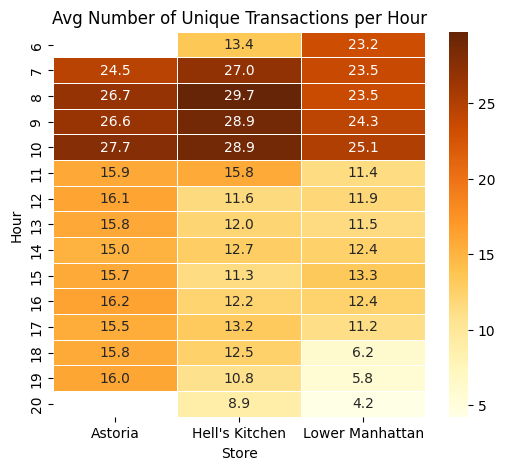

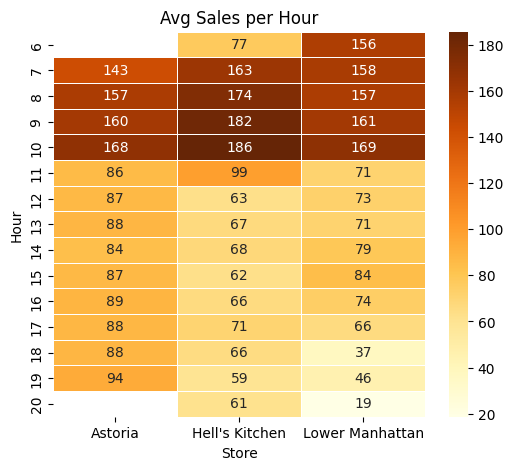

In [90]:
transactions_per_day = (
    unique_transactions
    .groupby(['store_location', 'transaction_date', 'hour'])['true_transaction_id']
    .count()
    .reset_index(name='transaction_count')
)

avg_transactions = (
    transactions_per_day
    .groupby(['store_location', 'hour'])['transaction_count']
    .mean()
    .reset_index(name='avg_transactions')
)

transactions_pivot = avg_transactions.pivot(index='hour', columns='store_location', values='avg_transactions')

sales_per_day = (
    df.groupby(['store_location', 'transaction_date', 'hour'])['sales_value']
    .sum()
    .reset_index(name='sales')
)

avg_sales = (
    sales_per_day
    .groupby(['store_location', 'hour'])['sales']
    .mean()
    .reset_index(name='avg_sales')
)

sales_pivot = avg_sales.pivot(index='hour', columns='store_location', values='avg_sales')

plt.figure(figsize=(6, 5))
sns.heatmap(transactions_pivot, cmap="YlOrBr", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Avg Number of Unique Transactions per Hour")
plt.ylabel("Hour")
plt.xlabel("Store")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(sales_pivot, cmap="YlOrBr", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Avg Sales per Hour")
plt.ylabel("Hour")
plt.xlabel("Store")
plt.show()


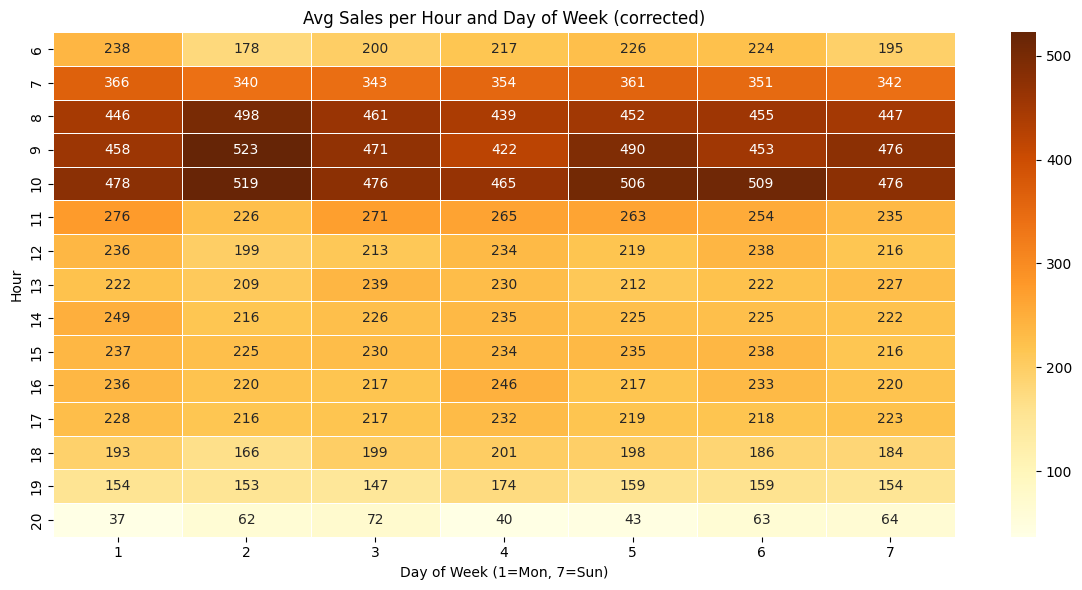

In [94]:
sales_hour_day = (
    df.groupby(['weekday_num', 'transaction_date', 'hour'])['sales_value']
    .sum()
    .reset_index()
)

avg_sales_hour_day = (
    sales_hour_day
    .groupby(['weekday_num', 'hour'])['sales_value']
    .mean()
    .reset_index(name='avg_sales')
)

pivot = avg_sales_hour_day.pivot(index='hour', columns='weekday_num', values='avg_sales')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlOrBr", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Avg Sales per Hour and Day of Week (corrected)")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()


In [161]:
morning_hours = [8, 9, 10, 11]
total_daily_sales = df.groupby('transaction_date')['sales_value'].sum()
morning_sales = df[df['hour'].isin(morning_hours)].groupby('transaction_date')['sales_value'].sum()
sales_share = (morning_sales / total_daily_sales * 100).dropna()
avg_morning_share = sales_share.mean()

print(f"Average share of daily sales from 8–11 AM: {avg_morning_share:.2f}%")


Average share of daily sales from 8–11 AM: 42.72%


### Opening hours changes impact

In [ ]:
astoria_df = df[df['store_location'] == 'Astoria'].copy()

late_opening_dates = (
    astoria_df.groupby('transaction_date')['hour']
    .min()
    .reset_index(name='opening_hour')
    .query('opening_hour == 11')['transaction_date']
)

avg_early_sales = (
    astoria_df[
        (~astoria_df['transaction_date'].isin(late_opening_dates)) &
        (astoria_df['hour'].between(7, 10))
    ]
    .groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

estimated_gain = avg_early_sales * len(late_opening_dates)

avg_total_daily_sales = (
    astoria_df.groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

summary = pd.DataFrame({
    'avg_morning_sales_on_normal_days': [avg_early_sales],
    'num_11am_opening_days': [len(late_opening_dates)],
    'estimated_total_gain_if_opened_early': [estimated_gain],
    'avg_total_daily_sales': [avg_total_daily_sales],
    'avg_total_daily_sales_with_morning_boost': [avg_total_daily_sales + avg_early_sales]
})

display(summary)

,avg_morning_sales_on_normal_days,num_11am_opening_days,estimated_total_gain_if_opened_early,avg_total_daily_sales,avg_total_daily_sales_with_morning_boost
0,616.86,36,"22,206.88","1,283.12","1,899.97"


In [98]:
hk_df = df[df['store_location'] == "Hell's Kitchen"].copy()

hk_opening_hours = (
    hk_df.groupby('transaction_date')['hour']
    .min()
    .reset_index(name='opening_hour')
)

open_6_days = hk_opening_hours[hk_opening_hours['opening_hour'] == 6]['transaction_date']
open_8_days = hk_opening_hours[hk_opening_hours['opening_hour'] == 8]['transaction_date']

sales_at_7_on_6am_days = hk_df[
    (hk_df['transaction_date'].isin(open_6_days)) &
    (hk_df['hour'] == 7)
]

avg_7am_sales = (
    sales_at_7_on_6am_days
    .groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

estimated_gain = avg_7am_sales * len(open_8_days)

avg_total_daily_sales = (
    hk_df.groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

summary_hk = pd.DataFrame({
    'avg_7am_sales_on_6am_days': [avg_7am_sales],
    'num_8am_opening_days': [len(open_8_days)],
    'estimated_total_gain_if_opened_at_7': [estimated_gain],
    'avg_total_daily_sales': [avg_total_daily_sales],
    'avg_total_daily_sales_with_7am_boost': [avg_total_daily_sales + avg_7am_sales]
})

display(summary_hk)


,avg_7am_sales_on_6am_days,num_8am_opening_days,estimated_total_gain_if_opened_at_7,avg_total_daily_sales,avg_total_daily_sales_with_7am_boost
0,162.87,83,"13,518.03","1,306.69","1,469.56"


In [100]:
lm_df = df[df['store_location'] == "Lower Manhattan"].copy()

lm_opening_hours = (
    lm_df.groupby('transaction_date')['hour']
    .min()
    .reset_index(name='opening_hour')
)

open_6_days_lm = lm_opening_hours[lm_opening_hours['opening_hour'] == 6]['transaction_date']
open_7_days_lm = lm_opening_hours[lm_opening_hours['opening_hour'] == 7]['transaction_date']

sales_at_6am = lm_df[
    (lm_df['transaction_date'].isin(open_6_days_lm)) &
    (lm_df['hour'] == 6)
]

avg_6am_sales = (
    sales_at_6am
    .groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

sales_at_6pm = lm_df[
    (lm_df['transaction_date'].isin(open_7_days_lm)) &
    (lm_df['hour'] == 18)
]

avg_6pm_sales = (
    sales_at_6pm
    .groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

avg_total_daily_sales_7am = (
    lm_df[lm_df['transaction_date'].isin(open_7_days_lm)]
    .groupby('transaction_date')['sales_value']
    .sum()
    .mean()
)

summary_lm = pd.DataFrame({
    'avg_sales_at_6am_on_6am_days': [avg_6am_sales],
    'avg_sales_at_6pm_on_7am_days': [avg_6pm_sales],
    'avg_total_daily_sales_on_7am_days': [avg_total_daily_sales_7am],
    'num_days_opened_at_7': [len(open_7_days_lm)]
})

display(summary_lm)


,avg_sales_at_6am_on_6am_days,avg_sales_at_6pm_on_7am_days,avg_total_daily_sales_on_7am_days,num_days_opened_at_7
0,156.19,41.20,"1,232.39",89


## Product performance


In [ ]:
df['quarter_num'] = df['transaction_date'].dt.quarter

total_q1_sales = df[df['quarter_num'] == 1]['sales_value'].sum()
total_q2_sales = df[df['quarter_num'] == 2]['sales_value'].sum()
total_growth = total_q2_sales - total_q1_sales

category_quarter_sales = (
    df.groupby(['product_category', 'quarter_num'])['sales_value']
    .sum()
    .unstack(fill_value=0)
    .rename(columns={1: 'Q1_sales', 2: 'Q2_sales'})
    .reset_index()
)

category_quarter_sales['q2_share_of_total'] = category_quarter_sales['Q2_sales'] / total_q2_sales * 100
category_quarter_sales['absolute_growth'] = category_quarter_sales['Q2_sales'] - category_quarter_sales['Q1_sales']
category_quarter_sales['relative_growth_pct'] = (
    (category_quarter_sales['Q2_sales'] / category_quarter_sales['Q1_sales'].replace(0, np.nan) - 1)
    .fillna(0) * 100
)
category_quarter_sales['contribution_to_total_growth_pct'] = category_quarter_sales['absolute_growth'] / total_growth * 100

category_quarter_sales = category_quarter_sales.sort_values(by='contribution_to_total_growth_pct', ascending=False)

category_quarter_sales[['product_category', 'q2_share_of_total', 'absolute_growth', 'relative_growth_pct', 'contribution_to_total_growth_pct']]


quarter_num,product_category,q2_share_of_total,absolute_growth,relative_growth_pct,contribution_to_total_growth_pct
2,Coffee,38.70,"72,293.65",73.15,38.97
8,Tea,28.08,"51,873.95",71.78,27.96
0,Bakery,11.72,"21,361.34",70.09,11.52
4,Drinking Chocolate,10.33,"18,969.00",70.98,10.23
3,Coffee beans,5.77,"10,927.35",74.95,5.89
1,Branded,1.96,"3,755.00",76.23,2.02
6,Loose Tea,1.58,"2,776.30",65.81,1.50
5,Flavours,1.21,"2,255.20",73.30,1.22
7,Packaged Chocolate,0.64,"1,285.32",82.33,0.69


In [ ]:
type_quarter_sales = (
    df.groupby(['product_type', 'quarter_num'])['sales_value']
    .sum()
    .unstack(fill_value=0)
    .rename(columns={1: 'Q1_sales', 2: 'Q2_sales'})
    .reset_index()
)

type_quarter_sales['absolute_growth'] = type_quarter_sales['Q2_sales'] - type_quarter_sales['Q1_sales']
type_quarter_sales['relative_growth_pct'] = (
    (type_quarter_sales['Q2_sales'] / type_quarter_sales['Q1_sales'].replace(0, np.nan) - 1)
    .fillna(0) * 100
)

type_quarter_sales.sort_values(by='absolute_growth', ascending=False).head(10)

quarter_num,product_type,Q1_sales,Q2_sales,absolute_growth,relative_growth_pct
0,Barista Espresso,"33,566.55","57,839.65","24,273.10",72.31
4,Brewed Chai tea,"28,174.50","48,907.45","20,732.95",73.59
13,Gourmet brewed coffee,"25,512.90","44,521.70","19,008.80",74.51
17,Hot chocolate,"26,723.50","45,692.50","18,969.00",70.98
6,Brewed herbal tea,"17,348.50","30,191.00","12,842.50",74.03
3,Brewed Black tea,"17,780.00","30,152.00","12,372.00",69.58
25,Premium brewed coffee,"14,232.15","24,549.00","10,316.85",72.49
22,Organic brewed coffee,"14,010.30","23,736.20","9,725.90",69.42
27,Scone,"13,581.72","23,284.40","9,702.68",71.44
10,Drip coffee,"11,507.50","20,476.50","8,969.00",77.94


## What sells with what?

In [142]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

basket = (
    df.groupby('true_transaction_id')['product_type']
    .apply(list)
    .tolist()
)

te = TransactionEncoder()
te_matrix = te.fit_transform(basket)
df_basket = pd.DataFrame(te_matrix, columns=te.columns_)

frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by="lift", ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
0,(Barista Espresso),(Regular syrup),0.04,0.30,7.13
1,(Regular syrup),(Barista Espresso),0.04,0.99,7.13
4,(Sugar free syrup),(Barista Espresso),0.02,0.99,7.13
5,(Barista Espresso),(Sugar free syrup),0.02,0.11,7.13
3,(Barista Espresso),(Scone),0.02,0.12,1.35
2,(Scone),(Barista Espresso),0.02,0.19,1.35


In [164]:

basket = (
    df.groupby('true_transaction_id')['product_category']
    .apply(list)
    .tolist()
)

te = TransactionEncoder()
te_matrix = te.fit_transform(basket)
df_basket = pd.DataFrame(te_matrix, columns=te.columns_)

frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by="lift", ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
8,(Flavours),"(Coffee, Bakery)",0.01,0.19,2.14
5,"(Coffee, Bakery)",(Flavours),0.01,0.12,2.14
3,(Flavours),(Coffee),0.06,1.00,2.00
2,(Coffee),(Flavours),0.06,0.12,2.00
6,"(Flavours, Bakery)",(Coffee),0.01,0.99,1.99
7,(Coffee),"(Flavours, Bakery)",0.01,0.02,1.99
1,(Bakery),(Flavours),0.01,0.06,1.02
0,(Flavours),(Bakery),0.01,0.20,1.02
4,"(Coffee, Flavours)",(Bakery),0.01,0.19,1.02
9,(Bakery),"(Coffee, Flavours)",0.01,0.06,1.02


In [ ]:
product_tx = (
    df.groupby(['true_transaction_id', 'product_type'])['transaction_qty']
    .sum()
    .reset_index()
)

multi_unit_summary = (
    product_tx.groupby('product_type')
    .agg(
        avg_qty_per_transaction=('transaction_qty', 'mean'),
        percent_multi_qty_tx=('transaction_qty', lambda x: (x > 1).mean() * 100),
        max_qty_in_one_tx=('transaction_qty', 'max'),
        num_transactions=('transaction_qty', 'count')
    )
    .sort_values(by='percent_multi_qty_tx', ascending=False)
)

multi_unit_summary.head(10)

,avg_qty_per_transaction,percent_multi_qty_tx,max_qty_in_one_tx,num_transactions
product_type,,,,
Sugar free syrup,1.60,56.63,4,1810
Regular syrup,1.53,51.35,5,4970
Brewed herbal tea,1.54,51.00,4,11236
Brewed Black tea,1.54,50.91,4,11334
Gourmet brewed coffee,1.54,50.79,3,16900
Organic brewed coffee,1.53,50.75,3,8488
Premium brewed coffee,1.53,50.63,3,8122
Brewed Chai tea,1.53,50.48,4,17146
Brewed Green tea,1.53,50.19,4,5667


In [173]:
tea_coffee_df = df[df['product_category'].isin(['Tea', 'Coffee'])].copy()

category_bulk = (
    tea_coffee_df
    .groupby(['true_transaction_id', 'product_category'])['transaction_qty']
    .sum()
    .reset_index()
)

category_bulk['is_bulk'] = category_bulk['transaction_qty'] > 1

bulk_stats = (
    category_bulk
    .groupby('product_category')['is_bulk']
    .mean()
    .reset_index(name='bulk_purchase_rate')
)

print(bulk_stats)


  product_category  bulk_purchase_rate
0           Coffee                0.50
1              Tea                0.51


## What sells when?

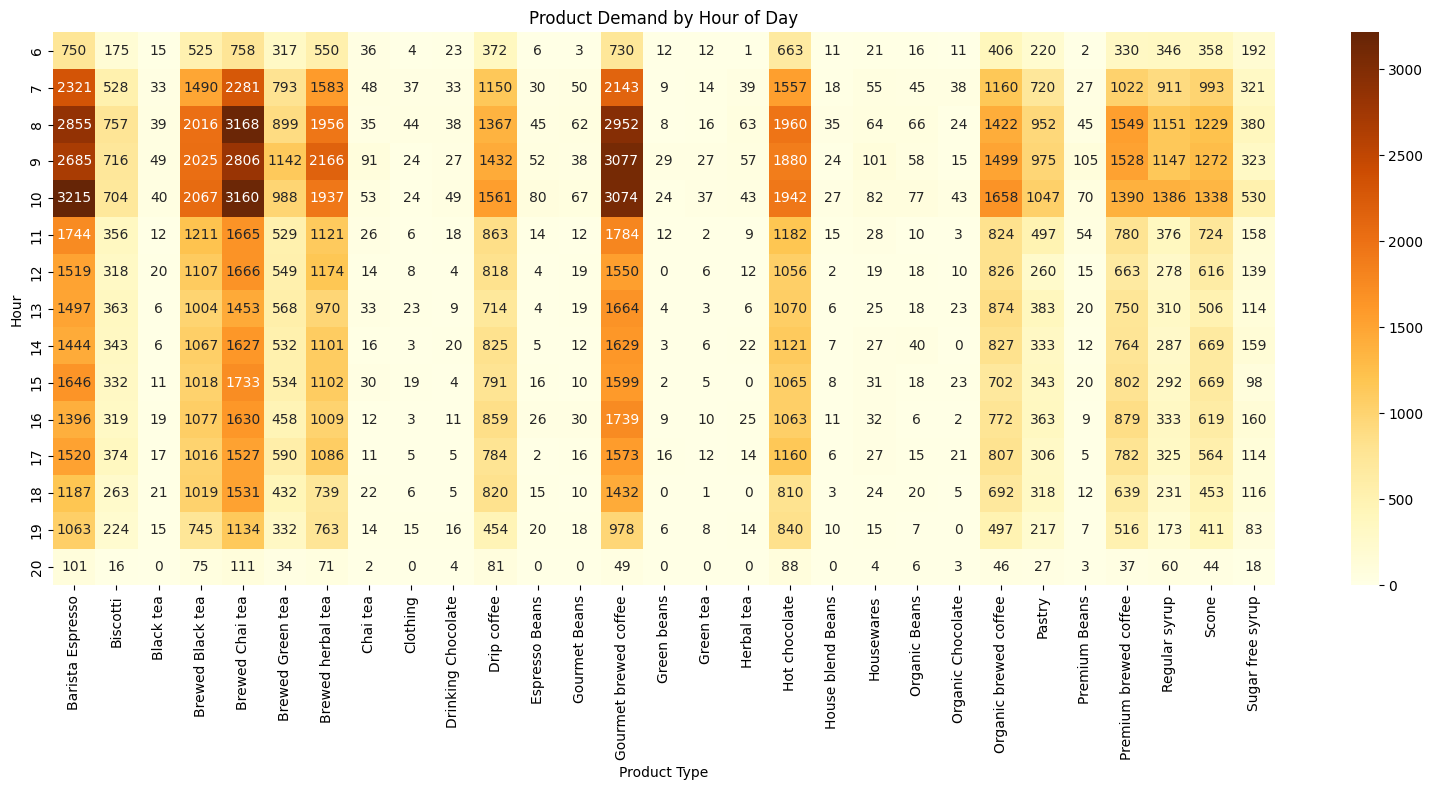

In [156]:
df['hour'] = df['datetime'].dt.hour
hourly_product = (
    df.groupby(['hour', 'product_type'])['transaction_qty']
    .sum()
    .reset_index()
)

product_hour_matrix = hourly_product.pivot(index='hour', columns='product_type', values='transaction_qty').fillna(0)
product_hour_matrix = product_hour_matrix.loc[range(6, 21)]  # Focus on open hours


plt.figure(figsize=(16, 8))
sns.heatmap(product_hour_matrix, cmap='YlOrBr', annot=True, fmt='.0f')
plt.title("Product Demand by Hour of Day")
plt.xlabel("Product Type")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

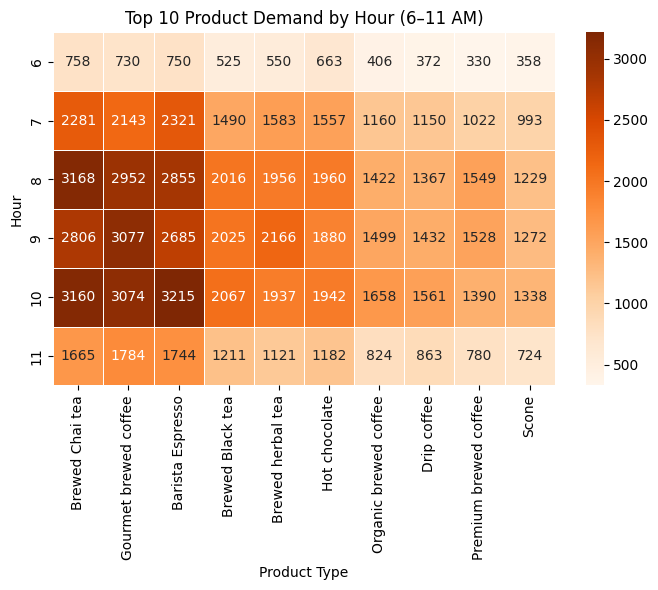

In [166]:
morning_df = df[df['hour'].between(6, 11)]

morning_product_hour = (
    morning_df.groupby(['hour', 'product_type'])['transaction_qty']
    .sum()
    .reset_index()
)

pivot = morning_product_hour.pivot(index='hour', columns='product_type', values='transaction_qty').fillna(0)

top_products = pivot.sum().sort_values(ascending=False).head(10).index
pivot_top = pivot[top_products]

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_top, cmap='Oranges', annot=True, fmt='.0f', linewidths=0.5)

plt.title("Top 10 Product Demand by Hour (6–11 AM)")
plt.xlabel("Product Type")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()


In [167]:

daily_category_sales = (
    df.groupby(['transaction_date', 'product_category'])['sales_value']
    .sum()
    .reset_index()
)

avg_category_sales = (
    daily_category_sales.groupby('product_category')['sales_value']
    .mean()
    .reset_index(name='avg_daily_sales')
)

total_avg_sales = avg_category_sales['avg_daily_sales'].sum()
avg_category_sales['pct_contribution'] = (avg_category_sales['avg_daily_sales'] / total_avg_sales * 100).round(2)
avg_category_sales = avg_category_sales.sort_values(by='pct_contribution', ascending=False)

display(avg_category_sales)


,product_category,avg_daily_sales,pct_contribution
2,Coffee,"1,491.45",37.07
8,Tea,"1,085.12",26.97
0,Bakery,454.78,11.30
4,Drinking Chocolate,400.09,9.94
3,Coffee beans,299.14,7.43
1,Branded,110.63,2.75
6,Loose Tea,84.31,2.10
5,Flavours,62.75,1.56
7,Packaged Chocolate,35.26,0.88


### Bakery

In [157]:
bakery_stats = df[df['product_category'] == 'Bakery'].groupby('product_type').agg(
    total_sales=('sales_value', 'sum'),
    total_qty=('transaction_qty', 'sum'),
    avg_qty=('transaction_qty', 'mean'),
    unique_tx=('true_transaction_id', 'nunique')
).sort_values(by='total_sales', ascending=False)

bakery_stats


,total_sales,total_qty,avg_qty,unique_tx
product_type,,,,
Scone,"36,866.12",10465,1.03,10085
Pastry,"25,655.99",6961,1.01,6660
Biscotti,"19,793.53",5788,1.01,5705


In [159]:
bakery_tx_ids = df[df['product_category'] == 'Bakery']['true_transaction_id'].unique()
basket_pairs = df[df['true_transaction_id'].isin(bakery_tx_ids)]
pair_counts = (
    basket_pairs.groupby(['true_transaction_id', 'product_category'])
    .size().unstack(fill_value=0)
)

pair_counts['drink_with_bakery'] = pair_counts[['Coffee', 'Tea', 'Drinking Chocolate']].sum(axis=1) > 0
share_with_drinks = pair_counts['drink_with_bakery'].mean()

print(f"Bakery bought with drink: {share_with_drinks:.1%}")


Bakery bought with drink: 91.7%
